# U.S. Medical Insurance Costs

Codecademy Portifolio Project by Syfa Collins

#### Project Objectives:

* Work locally on your own computer <br>
* Import a dataset into your program <br>
* Analyze a dataset by building out functions or class methods <br>
* Use libraries to assist in your analysis <br>
* Optional: Document and organize your findings <br>
* Optional: Make predictions about a dataset’s features based on your findings


#### Table of Contents

[Module 1: Importing and Formatting the Data](#data)<br>
[Module 2: Inspect Data](#inspect) <br>
[Module 3: Comparison to Insurance Charge Formula](#compare)<br>
[Module 4: Data Visualization](#data_vis)<br>
[Module 5: Data Aggregation](#aggr)



### Module 1 :  Importing and Formatting the Data <a id="data"></a>

In [83]:
# Import modules 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [75]:

data = pd.read_csv('insurance.csv')
df = pd.DataFrame(data)
df.head(n=20)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### Module 2: Inspect Data <a id="inspect"></a>

In [22]:
# Examine the column data types 

df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [46]:
# Analyze where the majority of individuals come from

df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


#### Handling Categories

In [64]:
# Creating dataframes for both smokers and non-smokers

do_smoke =  df[df['smoker'] == 'yes']
dont_smoke =  df[df['smoker'] == 'no']

dont_smoke

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [76]:
# Describing smokers

do_smoke.describe()


,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


In [77]:
# Describing non-smoker

dont_smoke.describe()


,age,bmi,children,charges
count,1064.000000,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,8434.268298
std,14.083410,6.043111,1.218136,5993.781819
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.315000,0.000000,3986.438700
50%,40.000000,30.352500,1.000000,7345.405300
75%,52.000000,34.430000,2.000000,11362.887050
max,64.000000,53.130000,5.000000,36910.608030


### Module 3: Comparison in costs between smokers and non smokers.<a id="compare"></a>


In [78]:

# Describing the categories together can help.
# used methods groupby(), describe().

grouped = df.groupby('smoker')
grouped_desc = grouped.describe()

grouped_desc


age                                                          bmi  \
         count       mean        std   min    25%   50%   75%   max   count   
smoker                                                                        
no      1064.0  39.385338  14.083410  18.0  26.75  40.0  52.0  64.0  1064.0   
yes      274.0  38.514599  13.923186  18.0  27.00  38.0  49.0  64.0   274.0   

                   ... children      charges                              \
             mean  ...      75%  max   count          mean           std   
smoker             ...                                                     
no      30.651795  ...      2.0  5.0  1064.0   8434.268298   5993.781819   
yes     30.708449  ...      2.0  5.0   274.0  32050.231832  11541.547176   

                                                                          
               min           25%          50%           75%          max  
smoker                                                                    
no       1121.8739   3986.438700   7345.40530  11362.887050  36910.60803  
yes     12829.4551  20826.244213  34456.34845  41019.207275  63770.42801  

[2 rows x 32 columns]

39

### Module 4: Data visualizations. <a id="data_vis">
create visualizations to compare the distribution of charges between smokers and non_smokers.
 A Histogram, box , plots or violin plots to visualize this.

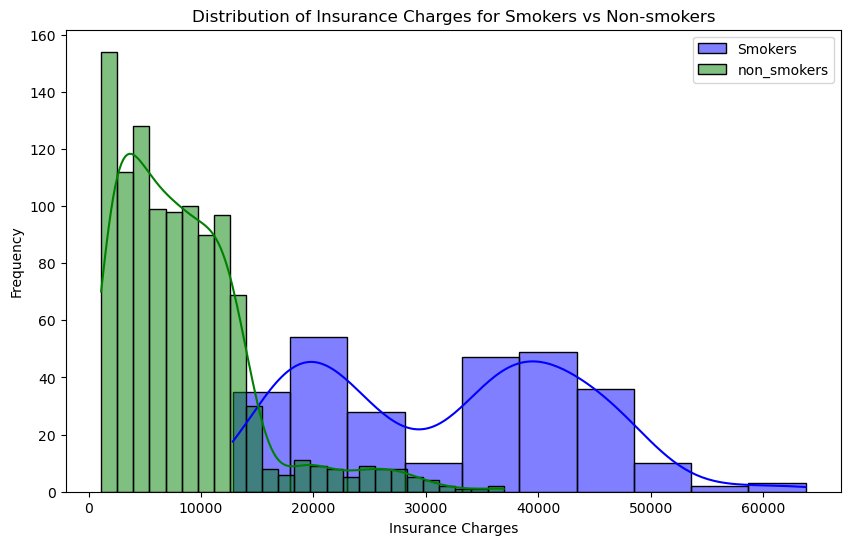

In [85]:
# data visualization

plt.figure(figsize=(10,6))
sns.histplot(do_smoke.charges, label = 'Smokers', kde=True, color='blue')
sns.histplot(dont_smoke.charges, label = 'non_smokers', kde=True, color='green')

plt.xlabel('Insurance Charges')
plt.ylabel('Frequency')

plt.title('Distribution of Insurance Charges for Smokers vs Non-smokers')

plt.legend()
plt.show()



### Module 5: Aggregation. <a id="aggr"></a>

In [95]:
### Find out the average age of the patients in the dataset.

sum_of_age = 0;
total_age = len(df['age'])

for i in df['age']:
    sum_of_age += i
    
    
print(sum_of_age)
average_age = sum_of_age // total_age
average_age


## The average age of patient is 39

52459


39

In [100]:

age_sum = df['age'].sum()
age_sum

52459